In [ ]:
# Import the four txt files with the coordinates for each path from path_txts folder and print each path (do not make a function). Also store each path splitting the string tuples into x and y float lists.
import numpy as np
import os
file_names = ['new_path_null.txt', 'new_path_linear.txt', 'new_path_gaussian.txt', 'new_path_inertial.txt']
path_folder = 'path_txts'
paths = []
for file_name in file_names:
    file_path = os.path.join(path_folder, file_name)
    with open(file_path, 'r') as f:
        path_data = f.read().strip().split('\n')
        path_coords = [tuple(map(float, coord.strip('()').split(','))) for coord in path_data]
        paths.append(path_coords)
        print(f"Path from {file_name}: {path_coords}")

Path from new_path_null.txt: [(0.0, 0.0), (30.0, 30.0), (20.0, 20.0), (10.0, 10.0), (0.0, 0.0), (10.0, 10.0), (20.0, 20.0), (-10.0, 10.0), (-40.0, 0.0), (-10.0, 10.0), (0.0, 20.0), (10.0, 30.0), (0.0, 40.0), (-30.0, 50.0), (-40.0, 60.0), (-30.0, 70.0), (-20.0, 80.0), (-10.0, 70.0), (-20.0, 60.0), (-10.0, 70.0)]
Path from new_path_linear.txt: [(0.0, 0.0), (10.0, -10.0), (20.0, -20.0), (30.0, -10.0), (40.0, -20.0), (30.0, -50.0), (0.0, -60.0), (10.0, -70.0), (20.0, -60.0), (30.0, -70.0), (40.0, -80.0), (50.0, -110.0), (40.0, -120.0), (50.0, -130.0), (40.0, -120.0), (70.0, -150.0), (40.0, -180.0), (10.0, -210.0), (20.0, -220.0), (50.0, -210.0)]
Path from new_path_gaussian.txt: [(100.0, 100.0), (70.0, 90.0), (60.0, 80.0), (50.0, 70.0), (20.0, 80.0), (-10.0, 90.0), (0.0, 80.0), (10.0, 90.0), (20.0, 80.0), (10.0, 50.0), (20.0, 60.0), (-10.0, 70.0), (0.0, 60.0), (10.0, 50.0), (20.0, 20.0), (30.0, 50.0), (0.0, 40.0), (10.0, 10.0), (40.0, 20.0), (10.0, -10.0)]
Path from new_path_inertial.txt: [

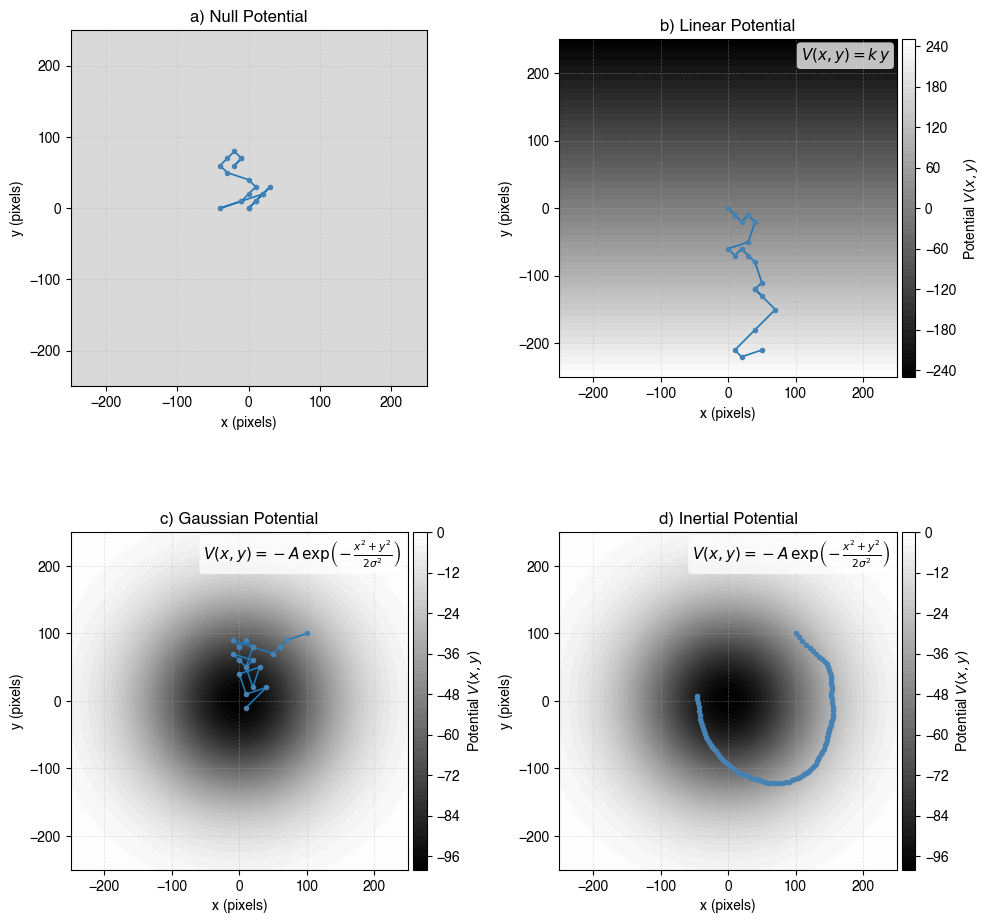

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# -----------------------------
# Functions for the potentials
# -----------------------------
def linear_potential(x, y, k=0):
    return k * y

def gaussian_potential(x, y, A=100, sigma=100):
    return -A * np.exp(-(x**2 + y**2) / (2 * sigma**2))


# -----------------------------
# Matplotlib config
# -----------------------------
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Helvetica", "Arial", "DejaVu Sans"]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

x = np.linspace(-250, 250, 500)
y = np.linspace(-250, 250, 500)
X, Y = np.meshgrid(x, y)

potentials = [
    lambda x, y: np.zeros_like(x),                      # Null potential
    lambda x, y: linear_potential(x, y, k=-1),           # Linear potential
    lambda x, y: gaussian_potential(x, y, A=100, sigma=100),  # Gaussian
    lambda x, y: gaussian_potential(x, y, A=100, sigma=100)   # Another Gaussian
]

titles = [
    'a) Null Potential',
    'b) Linear Potential',
    'c) Gaussian Potential',
    'd) Inertial Potential'
]

# -----------------------------
# Formula labels (skip first)
# -----------------------------
formula_labels = [
    None,  # a) Null potential -> no label
    r"$V(x,y)=k\,y$",
    r"$V(x,y)=-A\,\exp\!\left(-\,\frac{x^2+y^2}{2\sigma^2}\right)$",
    r"$V(x,y)=-A\,\exp\!\left(-\,\frac{x^2+y^2}{2\sigma^2}\right)$"
]

for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        idx = i * 2 + j

        Z = potentials[idx](X, Y)

        # --- Background potential + colorbar (skip for constant/null potential) ---
        if np.allclose(Z, Z.flat[0]):  # constant field (e.g., all zeros)
            ax.set_facecolor('0.85')  # light gray background (optional)
        else:
            cf = ax.contourf(X, Y, Z, levels=50, cmap='gray')
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="4%", pad=0.05)
            cb = fig.colorbar(cf, cax=cax)
            cb.set_label('Potential $V(x, y)$')

        # --- Path ---
        path = paths[idx]
        path_x = [coord[0] for coord in path]
        path_y = [coord[1] for coord in path]
        ax.plot(
            path_x, path_y, '-',
            linewidth=1.2, marker='o', markersize=4,
            markerfacecolor='steelblue', markeredgewidth=0
        )

        # --- Axes formatting (500x500 units) ---
        ax.set_xlim(-250, 250)
        ax.set_ylim(-250, 250)
        ax.set_title(titles[idx])
        ax.set_xlabel('x (pixels)')
        ax.set_ylabel('y (pixels)')
        ax.set_aspect('equal', adjustable='box')
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)

        # --- Formula label (top-right), skip null potential ---
        if formula_labels[idx] is not None:
            ax.text(
                0.98, 0.98, formula_labels[idx],
                transform=ax.transAxes,
                ha="right", va="top",
                fontsize=11,
                bbox=dict(
                    boxstyle="round,pad=0.25",
                    facecolor="white",
                    alpha=0.75,
                    edgecolor="none"
                )
            )

plt.tight_layout()
plt.show()

In [69]:
# Save figure as PDF
fig.savefig('subplots_paths.pdf', format='pdf', bbox_inches='tight', dpi=400)

# Save figure as PNG
fig.savefig('subplots_paths.png', format='png', bbox_inches='tight', dpi=400)